In [220]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [221]:
df = pd.read_excel("psg_goals.xlsx")

In [222]:
df['position_rank'] = df['position'].map({'CM':6, 'GK':1, 'CB':3, 'RB':2, 'LB':4, 'LW':8, 'RW':9, 'ST':10, 'RWB':7, 'CDM':5})
df = df.iloc[:,2:]

In [223]:
df['pred1'] = df['total_goals'].mean()
df['res1'] = df['total_goals'] - df['pred1']

In [224]:
df

,age,overall,potential,finishing,goal,match_played,total_goals,position_rank,pred1,res1
0,23,88,92,12,0,15,0,1,1.68,-1.68
1,23,84,87,75,1,14,3,2,1.68,1.32
2,36,84,84,65,0,13,0,3,1.68,-1.68
3,20,80,88,59,0,12,1,4,1.68,-0.68
4,28,88,90,45,0,14,1,3,1.68,-0.68
5,26,83,85,79,0,7,0,6,1.68,-1.68
6,29,87,87,60,0,14,0,6,1.68,-1.68
7,30,89,89,83,1,14,11,8,1.68,9.32
8,22,79,89,66,0,13,0,6,1.68,-1.68
9,35,91,91,90,1,13,7,9,1.68,5.32


In [225]:
from sklearn.tree import DecisionTreeRegressor
tree1 = DecisionTreeRegressor(max_leaf_nodes=8)

In [226]:
df.columns

Index(['age', 'overall', 'potential', 'finishing', 'goal', 'match_played',
       'total_goals', 'position_rank', 'pred1', 'res1'],
      dtype='object')

In [227]:
tree1.fit(df[['age', 'overall', 'potential', 'finishing', 'goal', 'match_played', 'position_rank']].values.reshape(25,7),df['res1'].values)

DecisionTreeRegressor(max_leaf_nodes=8)

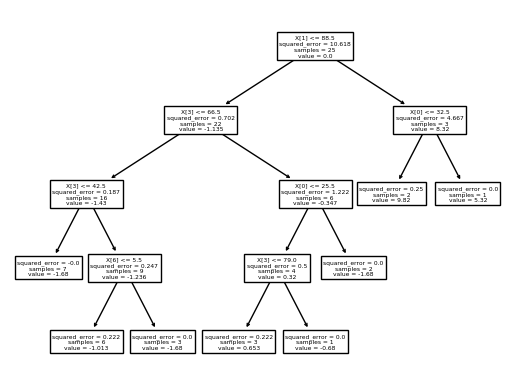

In [228]:
from sklearn.tree import plot_tree
plot_tree(tree1)
plt.show()

In [229]:
# generating X_test
X_test = np.random.randint(60, 95, 25)

In [230]:
df['pred2'] = 1.68 + tree1.predict(df[['age', 'overall', 'potential', 'finishing', 'goal', 'match_played', 'position_rank']])

c:\users\vaishno kumar\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


In [231]:
df['res2'] = df['total_goals'] - df['pred2']

In [232]:
tree2 = DecisionTreeRegressor(max_leaf_nodes=8)
tree2.fit(df[['age', 'overall', 'potential', 'finishing', 'goal', 'match_played', 'position_rank']].values.reshape(25,7),df['res2'].values)

DecisionTreeRegressor(max_leaf_nodes=8)

In [233]:
df

,age,overall,potential,finishing,goal,match_played,total_goals,position_rank,pred1,res1,pred2,res2
0,23,88,92,12,0,15,0,1,1.68,-1.68,0.000000,0.000000
1,23,84,87,75,1,14,3,2,1.68,1.32,2.333333,0.666667
2,36,84,84,65,0,13,0,3,1.68,-1.68,0.666667,-0.666667
3,20,80,88,59,0,12,1,4,1.68,-0.68,0.666667,0.333333
4,28,88,90,45,0,14,1,3,1.68,-0.68,0.666667,0.333333
5,26,83,85,79,0,7,0,6,1.68,-1.68,0.000000,0.000000
6,29,87,87,60,0,14,0,6,1.68,-1.68,0.000000,0.000000
7,30,89,89,83,1,14,11,8,1.68,9.32,11.500000,-0.500000
8,22,79,89,66,0,13,0,6,1.68,-1.68,0.000000,0.000000
9,35,91,91,90,1,13,7,9,1.68,5.32,7.000000,0.000000


In [234]:
df['pred3'] = 1.68 + tree1.predict(df[['age', 'overall', 'potential', 'finishing', 'goal', 'match_played', 'position_rank']])+tree2.predict(df[['age', 'overall', 'potential', 'finishing', 'goal', 'match_played', 'position_rank']])

c:\users\vaishno kumar\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
c:\users\vaishno kumar\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


In [235]:
df

,age,overall,potential,finishing,goal,match_played,total_goals,position_rank,pred1,res1,pred2,res2,pred3
0,23,88,92,12,0,15,0,1,1.68,-1.68,0.000000,0.000000,0.000000
1,23,84,87,75,1,14,3,2,1.68,1.32,2.333333,0.666667,2.733333
2,36,84,84,65,0,13,0,3,1.68,-1.68,0.666667,-0.666667,0.000000
3,20,80,88,59,0,12,1,4,1.68,-0.68,0.666667,0.333333,1.066667
4,28,88,90,45,0,14,1,3,1.68,-0.68,0.666667,0.333333,1.066667
5,26,83,85,79,0,7,0,6,1.68,-1.68,0.000000,0.000000,-0.133333
6,29,87,87,60,0,14,0,6,1.68,-1.68,0.000000,0.000000,-0.083333
7,30,89,89,83,1,14,11,8,1.68,9.32,11.500000,-0.500000,11.416667
8,22,79,89,66,0,13,0,6,1.68,-1.68,0.000000,0.000000,-0.083333
9,35,91,91,90,1,13,7,9,1.68,5.32,7.000000,0.000000,6.916667


In [236]:
df['res3'] = df['total_goals'] - df['pred3']

In [237]:
tree3 = DecisionTreeRegressor(max_leaf_nodes=8)
tree3.fit(df[['age', 'overall', 'potential', 'finishing', 'goal', 'match_played', 'position_rank']].values.reshape(25,7),df['res3'].values)

DecisionTreeRegressor(max_leaf_nodes=8)

In [238]:
df['pred4'] = 1.68 + tree1.predict(df[['age', 'overall', 'potential', 'finishing', 'goal', 'match_played', 'position_rank']])+tree2.predict(df[['age', 'overall', 'potential', 'finishing', 'goal', 'match_played', 'position_rank']])+tree3.predict(df[['age', 'overall', 'potential', 'finishing', 'goal', 'match_played', 'position_rank']])

c:\users\vaishno kumar\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
c:\users\vaishno kumar\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
c:\users\vaishno kumar\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


In [239]:
df

,age,overall,potential,finishing,goal,match_played,total_goals,position_rank,pred1,res1,pred2,res2,pred3,res3,pred4
0,23,88,92,12,0,15,0,1,1.68,-1.68,0.000000,0.000000,0.000000,0.000000,0.027778
1,23,84,87,75,1,14,3,2,1.68,1.32,2.333333,0.666667,2.733333,0.266667,2.887500
2,36,84,84,65,0,13,0,3,1.68,-1.68,0.666667,-0.666667,0.000000,0.000000,-0.016667
3,20,80,88,59,0,12,1,4,1.68,-0.68,0.666667,0.333333,1.066667,-0.066667,1.054167
4,28,88,90,45,0,14,1,3,1.68,-0.68,0.666667,0.333333,1.066667,-0.066667,1.054167
5,26,83,85,79,0,7,0,6,1.68,-1.68,0.000000,0.000000,-0.133333,0.133333,0.020833
6,29,87,87,60,0,14,0,6,1.68,-1.68,0.000000,0.000000,-0.083333,0.083333,0.016667
7,30,89,89,83,1,14,11,8,1.68,9.32,11.500000,-0.500000,11.416667,-0.416667,11.000000
8,22,79,89,66,0,13,0,6,1.68,-1.68,0.000000,0.000000,-0.083333,0.083333,-0.095833
9,35,91,91,90,1,13,7,9,1.68,5.32,7.000000,0.000000,6.916667,0.083333,6.944444


In [250]:
def gradient_boost(X,y,number,lr,count=1,regs=[],foo=None):

  if number == 0:
    return 
  else:
    # do gradient boosting

    if count > 1:
      y = y - regs[-1].predict(X)
    else:
      foo = y

    tree_reg = DecisionTreeRegressor(max_depth=5, random_state=42)
    tree_reg.fit(X, y)

    regs.append(tree_reg)

    x1 = df[['age', 'overall', 'potential', 'finishing', 'goal', 'match_played', 'position_rank']]
    y_pred = sum(lr * regressor.predict(x1) for regressor in regs)

    print(number)
    plt.figure()
    plt.plot(x1, y_pred, linewidth=2)
    # plt.plot(X[:, 7], foo,"r.")
    plt.show()

    gradient_boost(X,y,number-1,lr,count+1,regs,foo=foo)

5


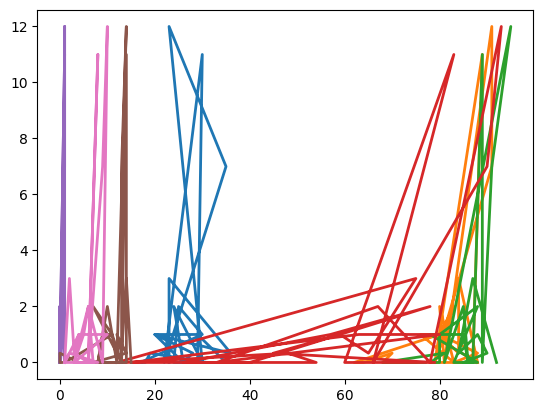

4


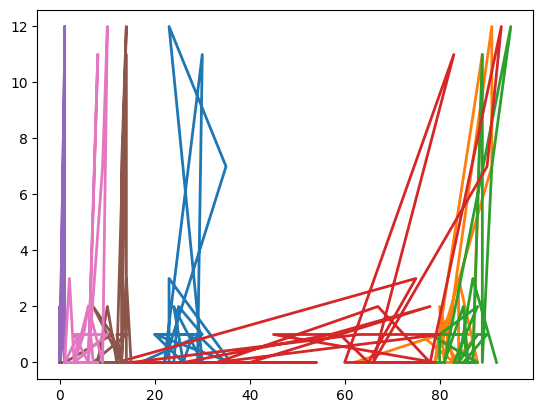

3


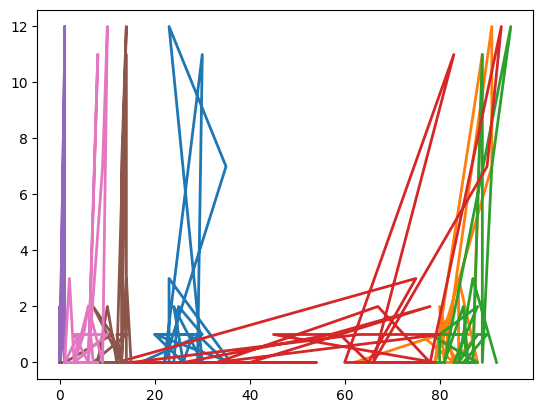

2


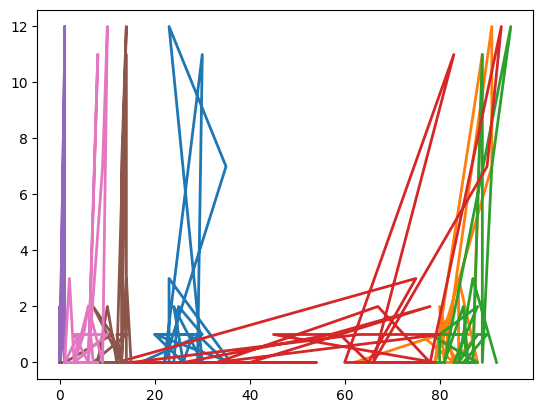

1


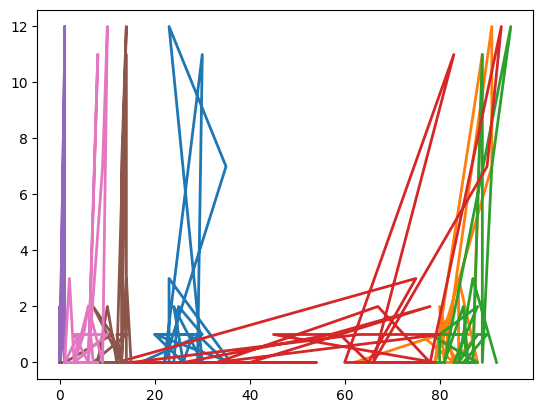

In [251]:
gradient_boost(df[['age', 'overall', 'potential', 'finishing', 'goal', 'match_played', 'position_rank']],df['total_goals'],5,lr=1)